In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
N = 1024

In [10]:
T = np.logspace(1, 8, N)

In [11]:
T_eV = T / 11605.
log_T_eV = np.log(T_eV)

In [90]:
k1 = np.exp(-32.71396786375
          + 13.53655609057*log_T_eV
          - 5.739328757388*log_T_eV**2 
          + 1.563154982022*log_T_eV**3
          - 0.2877056004391*log_T_eV**4
          + 0.03482559773736999*log_T_eV**5
          - 0.00263197617559*log_T_eV**6
          + 0.0001119543953861*log_T_eV**7
          - 2.039149852002e-6*log_T_eV**8)
k2 = 4.881357e-6*T**(-1.5)* (1.+1.14813e2 * T**(-0.407))**(-2.242)

In [21]:
def sampling_rate(N):
    plt.loglog(T, k1, label='k1')
    plt.loglog(T[::N], k1[::N], label='k1s')
    plt.loglog(T, k2, label='k2')
    plt.loglog(T[::N], k2[::N], label='k2s')
    plt.ylim(1e-19, 1e-7)
    plt.legend(loc="lower left")

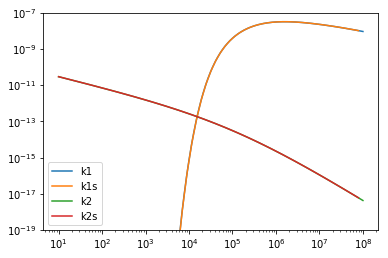

In [25]:
sampling_rate(16)

$dS/dt$

So for atomic hydrogen, we have destruction from:

* H + de
* H + H
* H + He
 
For atomic hydrogen, we have formation from:

* H+ + de

In [26]:
import sympy

In [40]:
HI, HII, HeI, HeII, HeIII, de = sympy.sympify(
"HI, HII, HeI, HeII, HeIII, de")
k1, k2, k3, k4, k5, k6, k7, k8 = sympy.sympify(
"k1, k2, k3, k4, k5, k6, k7, k8")

In [79]:
r1 = (HI + de), (HII + de + de), k1
r2 = (HII + de), (HI), k2
r3 = (HeI + de), (HeII + de + de), k3
r4 = (HeII + de), (HeI), k4
r5 = (HeII + de), (HeIII + de + de), k5
r6 = (HeIII + de), (HeII), k6
r7 = (HI + HI), (HII + de + HI), k7
r8 = (HI + HeI), (HII + de + HeI), k8

In [80]:
all_reactions = [r1, r2, r3, r4, r5, r6, r7, r8]
all_reactions = [r1, r2]

In [81]:
def find_formation(species):
    rxns = []
    for r in all_reactions:
        if species in r[1].atoms():
            rxns.append(r)
    return rxns

def find_destruction(species):
    rxns = []
    for r in all_reactions:
        if species in r[0].atoms():
            rxns.append(r)
    return rxns

In [82]:
find_formation(HI)

[(HII + de, HI, k2)]

In [83]:
find_destruction(HI)

[(HI + de, HII + 2*de, k1)]

In [84]:
def get_rhs(species):
    dSdt = 0
    for lhs, rhs, coeff in find_formation(species):
        term = coeff
        for atom in list(lhs.atoms()):
            term *= atom
        dSdt += term
    for lhs, rhs, coeff in find_destruction(species):
        term = -coeff
        for atom in list(lhs.atoms()):
            term *= atom
        dSdt += term
    return dSdt

In [85]:
get_rhs(HI)

-HI*de*k1 + HII*de*k2

In [86]:
get_rhs(HII)

HI*de*k1 - HII*de*k2

In [88]:
sympy.solve(get_rhs(HI))

[{HI: HII*k2/k1}, {de: 0}]

(1e-07, 10.0)

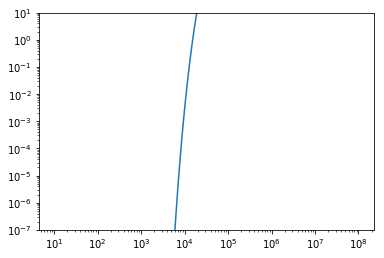

In [95]:
plt.loglog(T, k1/k2, "-")
plt.ylim(1e-7, 10.0)